In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
df_aggregation = [pd.read_csv(filename) for filename in glob.glob("assignment1/*.csv")]
df = pd.concat(df_aggregation, axis=0)

In [3]:
df.head()

,Timestamp,#Images,UA,Ad,ISP,Province,PageType,Tnet,Tserver,Tbrowser,Tother,SRT
0,1412006400,23,Chrome,noAD,UNICOM,Heinan,async,414.0,104.00,20.0,136.0,674.00
1,1412006400,0,MSIE 8.0,noAD,CMNET,Shandong,async,88.0,319.00,31.0,0.0,438.00
2,1412006401,18,Others,noAD,CHINANET,Tianjin,async,137.0,159.00,32.0,123.0,451.00
3,1412006402,30,Chrome,noAD,UNICOM,Heinan,sync,840.0,146.56,94.0,836.0,1916.56
4,1412006402,36,Chrome,noAD,GWBN,Tianjin,async,134.0,101.00,93.0,328.0,656.00


In [4]:
df['Date'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index('Date',inplace=True)

## Task 1 - 10Min Mean SRT

In [5]:
df_ten_minutes = df.resample(rule='10T').mean()

In [6]:
df_ten_minutes.head()

,Timestamp,#Images,Tnet,Tserver,Tbrowser,Tother,SRT
Date,,,,,,,
2014-09-21 16:00:00,1.411315e+09,19.890870,240.866494,231.211210,113.980551,320.478120,906.536375
2014-09-21 16:10:00,1.411316e+09,19.356613,234.484759,227.134765,107.037701,326.986403,895.643628
2014-09-21 16:20:00,1.411317e+09,19.870434,207.013556,227.753990,116.294969,325.405238,876.467753
2014-09-21 16:30:00,1.411317e+09,20.235779,223.563776,223.181509,110.717230,335.168178,892.630692
2014-09-21 16:40:00,1.411318e+09,19.253812,236.600108,225.313283,110.222422,302.815247,874.951058


In [7]:
# df_ten_minutes.index

In [8]:
# df_ten_minutes['SRT'].plot(kind='line',figsize=(16,8))
# plt.title('10min Mean SRT')
# plt.ylabel('Response Time (ms)')
# plt.xlabel('Time (Days)')
# plt.savefig('SRT_10Min.png',bbox_inches='tight')

/home/millana/anaconda3/envs/machineLearning/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


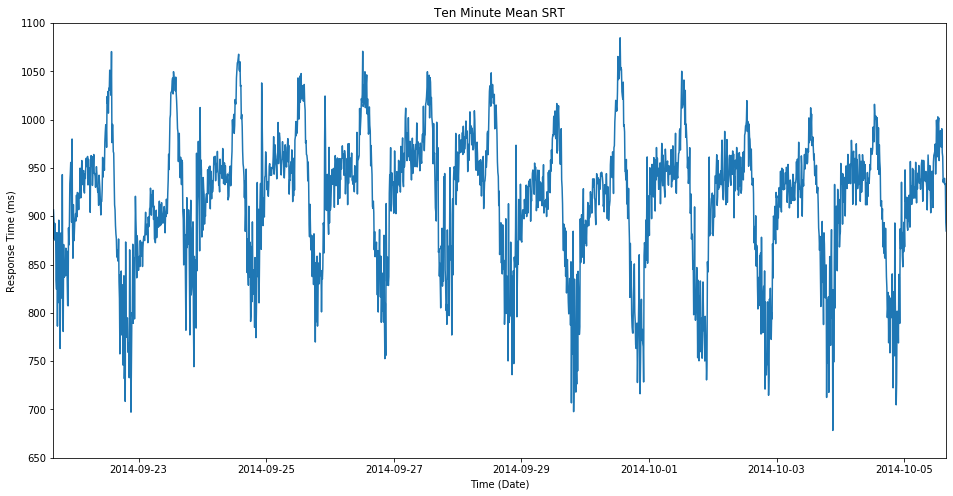

In [9]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_ten_minutes.index,df_ten_minutes['SRT'])

ax.set_ylabel('Response Time (ms)')
ax.set_xlabel('Time (Date)')

plt.margins(0,0)
plt.ylim(650,1100)
plt.title('Ten Minute Mean SRT')
plt.savefig('SRT_10Min.png',bbox_inches='tight')

## Task2.1 - Stacked Area Chart

In [10]:
# df_ten_minutes.index

In [11]:
# df_ten_minutes[['Tnet','Tserver','Tbrowser','Tother']].plot(kind='area',figsize=(14,10))
# plt.title('10Min Average Component Stacked Area Chart')
# plt.ylabel('Response Time (ms)')
# plt.legend(loc='lower right')
# plt.savefig('ComponentRT_10Min_SAC.png',bbox_inches='tight')

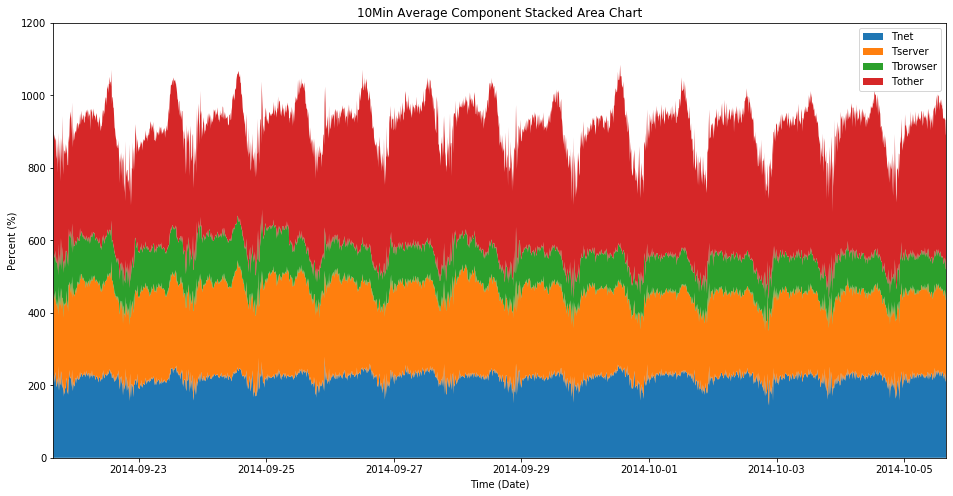

In [12]:
fig, ax = plt.subplots(figsize=(16,8))

ax.stackplot(df_ten_minutes.index,
             df_ten_minutes['Tnet'],
             df_ten_minutes['Tserver'],
             df_ten_minutes['Tbrowser'],
             df_ten_minutes['Tother'],
             labels=['Tnet','Tserver','Tbrowser','Tother']
            )

ax.set_ylabel('Percent (%)')
ax.set_xlabel('Time (Date)')

plt.ylim(0,1200)
plt.title('10Min Average Component Stacked Area Chart')
plt.legend()
plt.margins(0,0)
plt.legend(loc='upper right')
plt.savefig('ComponentRT_10Min_SAC.png',bbox_inches='tight')

## Task2.2 - 100% Stacked Area Chart

In [13]:
data = df_ten_minutes[['Tnet','Tserver','Tbrowser','Tother']]

# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0).mul(100)

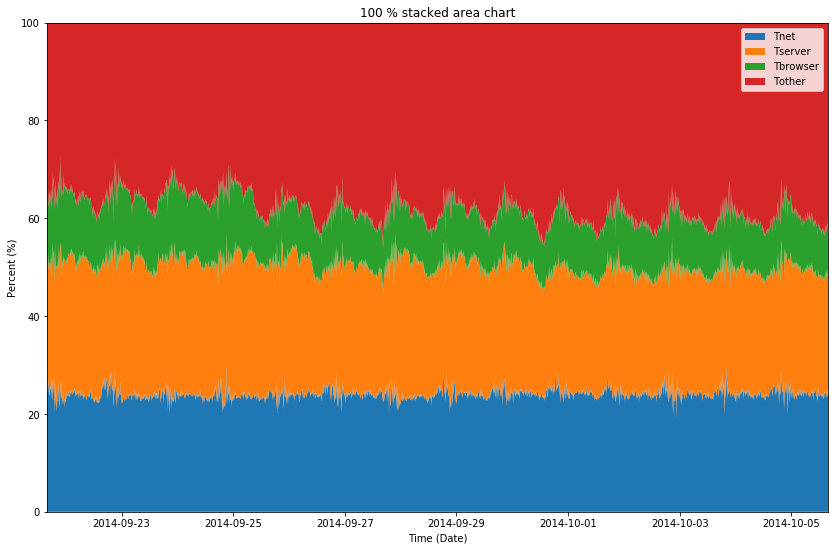

In [14]:
fig, ax = plt.subplots(figsize=(14,9))

ax.stackplot(df_ten_minutes.index,
              data_perc["Tnet"],data_perc["Tserver"],
              data_perc["Tbrowser"],data_perc["Tother"],
              labels=['Tnet','Tserver','Tbrowser','Tother'],)

ax.set_ylabel('Percent (%)')
ax.set_xlabel('Time (Date)')

plt.margins(0,0)
plt.legend(loc='upper right')
plt.title('100 % stacked area chart')
plt.savefig('ComponentRT_10Min_100SAC.png',bbox_inches='tight')

## Task 3 - Cumulative Distribution Function SRT

In [15]:
total = df['SRT'].count()

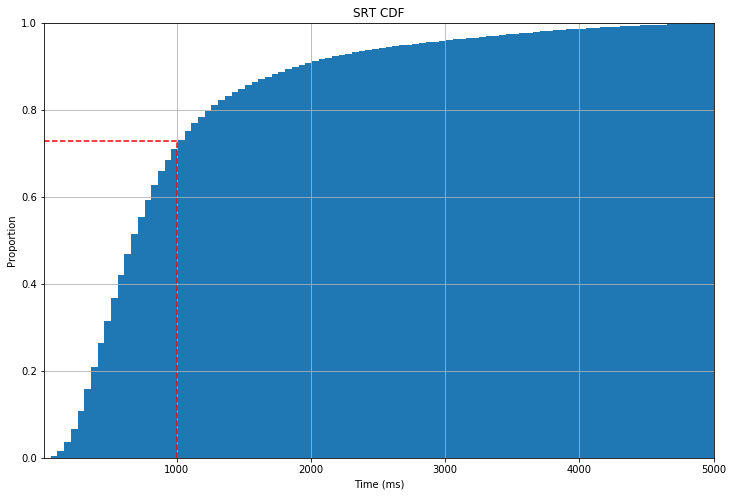

In [30]:
df['SRT'].hist(cumulative=True,density=True,bins=100,figsize=(12,8))
plt.title('SRT CDF')
plt.margins(0,0)
plt.xlabel('Time (ms)')
plt.ylabel('Proportion')
plt.axvline(x=1000,ymax=0.729,color='red',ls='dashed')
plt.axhline(y=0.729,xmax=1/5,color='red',ls='dashed')
plt.savefig('CDF_SRT.png',bbox_inches='tight')

## Task 4 - CDF #Images

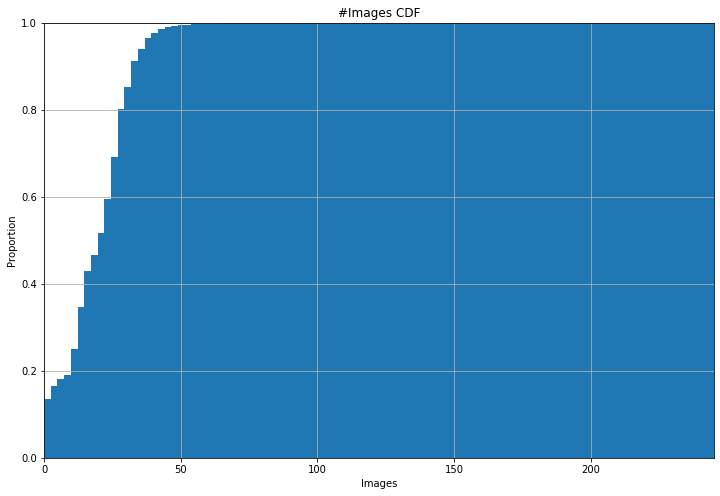

In [32]:
df['#Images'].hist(cumulative=True,density=True,bins=100,figsize=(12,8))
plt.title('#Images CDF')
plt.margins(0,0)
plt.xlabel('Images')
plt.ylabel('Proportion')
plt.savefig('CDF_Images.png',bbox_inches='tight')

In [ ]:
df[]

## Task 5 - Minute-lvl PVs

In [18]:
df_mnt_queries = pd.DataFrame(df.resample(rule='1T').count().iloc[:,0])
df_mnt_queries = df_mnt_queries.rename(columns={'Timestamp': 'PVs'})

Text(0, 0.5, 'PVs')

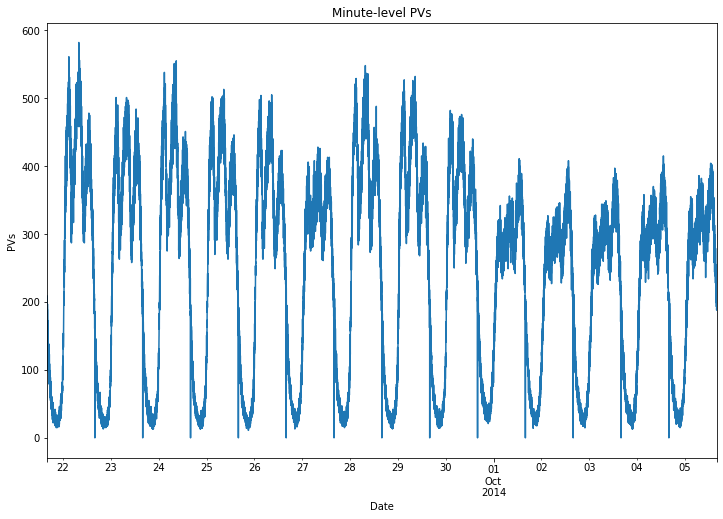

In [19]:
df_mnt_queries['PVs'].plot(kind='line',figsize=(12,8))
plt.title('Minute-level PVs')
plt.ylabel('PVs')
# plt.savefig('CDF_PVs.png',bbox_inches='tight')

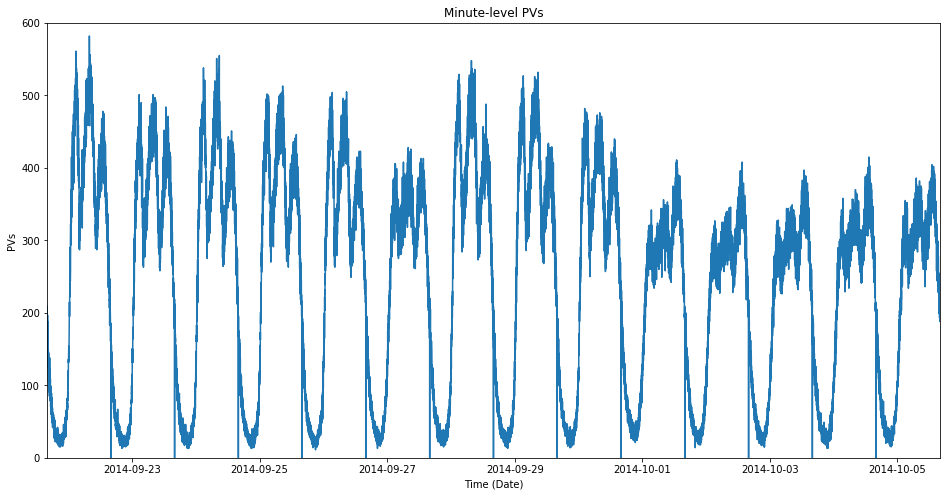

In [20]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_mnt_queries.index,df_mnt_queries['PVs'])

ax.set_ylabel('PVs')
ax.set_xlabel('Time (Date)')

plt.margins(0,0)
plt.ylim(0,600)
plt.title('Minute-level PVs')
plt.savefig('CDF_PVs.png',bbox_inches='tight')

## Task 6 - Total PVs / Province

In [21]:
df_prov_queries = pd.DataFrame(df.groupby(['Province']).count().iloc[:,0])
df_prov_queries = df_prov_queries.rename(columns={'Timestamp': 'PVs'})

In [22]:
df_prov_queries = df_prov_queries.sort_values(by=['PVs'],ascending=False)

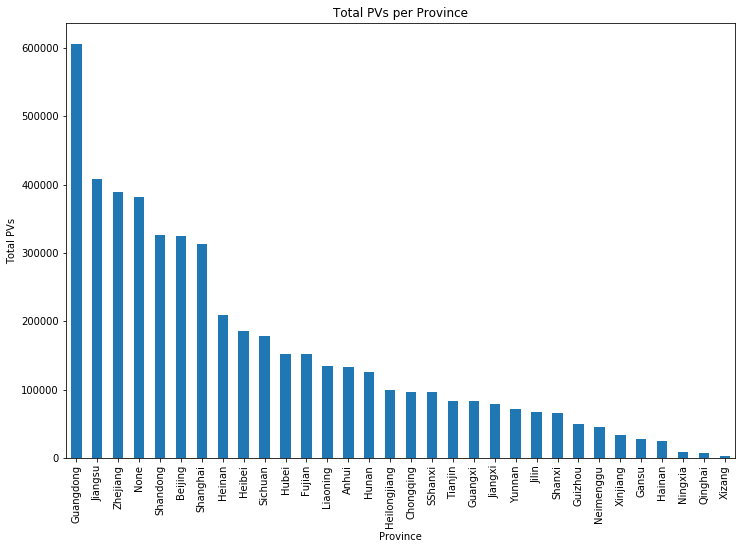

In [23]:
df_prov_queries['PVs'].plot(kind='bar',figsize=(12,8))
plt.ylabel('Total PVs')
plt.title('Total PVs per Province')
plt.savefig('PVs_Province.png',bbox_inches='tight')

## Task 7 - Total PVs / UA 

In [24]:
df_ua_queries = pd.DataFrame(df.groupby(['UA']).count().iloc[:,0])
df_ua_queries = df_ua_queries.rename(columns={'Timestamp': 'PVs'})

In [25]:
df_ua_queries = df_ua_queries.sort_values(by=['PVs'],ascending=False)

In [26]:
# df_ua_queries

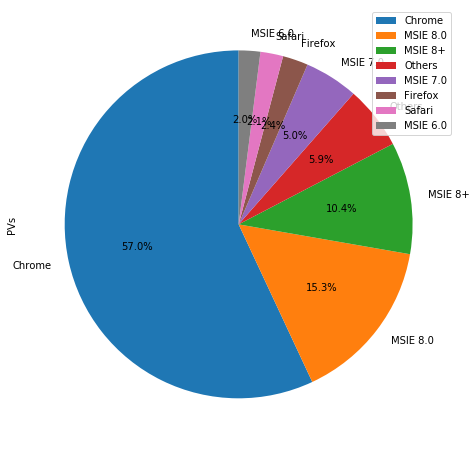

In [27]:
df_ua_queries['PVs'].plot(kind='pie',figsize=(12,8),autopct='%1.1f%%',startangle=90)
plt.legend()
# plt.savefig('Pie_AU.png',bbox_inches='tight')

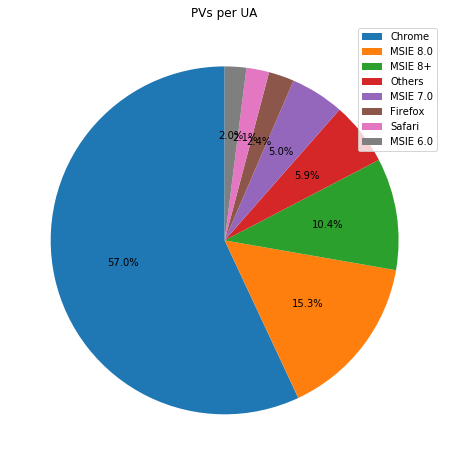

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(df_ua_queries['PVs'], autopct='%.1f%%', startangle=90)
ax.legend(df_ua_queries.index, loc='upper right')
ax.set_aspect('equal')
plt.title('PVs per UA')
plt.savefig('Pie_AU.png',bbox_inches='tight')

In [29]:
df_ua_queries

,PVs
UA,
Chrome,2826199
MSIE 8.0,759051
MSIE 8+,516059
Others,291196
MSIE 7.0,247938
Firefox,117313
Safari,104711
MSIE 6.0,99459
